# Calibration and Apriltag Measurement Testing

## Imports

In [1]:
import sys
import time
import matplotlib.pyplot as plt
import cv2
import math

import delivery_driver as dd

sys.path.append("../../deliveryrobot")
from utilities.utilities import *
from sensors.camera.apriltagsensor import *
from sensors.calibration.camera_calibration import *

## Camera Initialization

In [2]:
robot = dd.DeliveryRobot()
sensor = AprilTagSensor(cal_dir)

AprilTag sensor setup COMPLETE


## Get Measurement

In [3]:
actual_measurements = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6]
meas0 = []
meas1 = []
meas2 = []

In [11]:
count = 0

april_img = robot.take_picture(image_dir + "/testing/apriltagsensor_test/")
measurements={}
sensor.detect(april_img, measurements)
print(f"{measurements['1'][0]}\t{measurements['1'][1]}\t{measurements['1'][2]}")
meas0.append(measurements['1'][0])
meas1.append(measurements['1'][1])
meas2.append(measurements['1'][2])

Pose [[ 0.75920564 -0.00857753 -0.6507943  -0.00661779]
 [ 0.00433939  0.99995764 -0.00811728 -0.00470238]
 [ 0.65083636  0.00333863  0.7592107   0.09036659]
 [ 0.          0.          0.          1.        ]]
-0.004397471196813635	0.708685523053129	1.5765119663708773


[-0.015131729143798544, 0.001221476982758107, -0.03227785787554673, -0.013465221198161827, -0.07979265890252414, -0.007036103947817275, -0.004397471196813635]
[-0.6385392673086298, -0.488404093349181, -0.3463031138416391, -0.25908498803640645, 0.42669995265948585, 0.5759447207438616, 0.708685523053129]
[1.5857567862385102, 1.5864722623066285, 1.5873353554143843, 1.5928386564658938, 1.5721044084670501, 1.571609634826467, 1.5765119663708773]


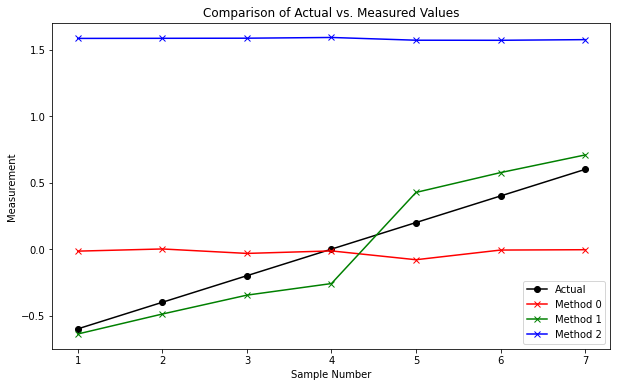

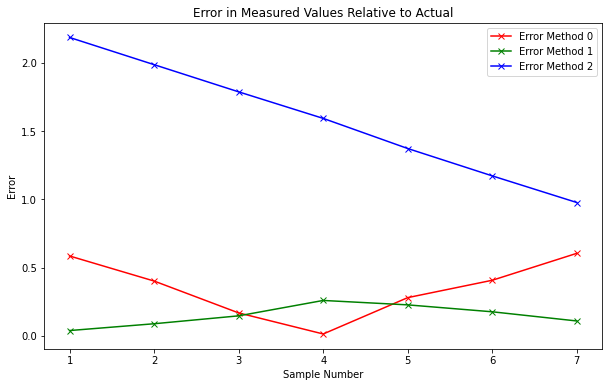

In [12]:
print(meas0)
print(meas1)
print(meas2)

# Calculate errors relative to the actual measurements
error_meas0 = [abs(m0 - actual) for m0, actual in zip(meas0, actual_measurements)]
error_meas1 = [abs(m1 - actual) for m1, actual in zip(meas1, actual_measurements)]
error_meas2 = [abs(m2 - actual) for m2, actual in zip(meas2, actual_measurements)]

# Plot actual measurements and the three sets of measurements
plt.figure(figsize=(10, 6))

sample_numbers = list(range(1, 8))  # Samples 1 through 7

# Plot actual values
plt.plot(sample_numbers, actual_measurements, label='Actual', marker='o', color='black')

# Plot method 1 measurements
plt.plot(sample_numbers, meas0, label='Method 0', marker='x', color='red')

# Plot method 2 measurements
plt.plot(sample_numbers, meas1, label='Method 1', marker='x', color='green')

# Plot method 3 measurements
plt.plot(sample_numbers, meas2, label='Method 2', marker='x', color='blue')

# Add labels and legend
plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual vs. Measured Values')
plt.legend()

# Show the plot
plt.show()

# Optional: If you also want to plot the errors, here’s how:
plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, error_meas0, label='Error Method 0', marker='x', color='red')
plt.plot(sample_numbers, error_meas1, label='Error Method 1', marker='x', color='green')
plt.plot(sample_numbers, error_meas2, label='Error Method 2', marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Error')
plt.title('Error in Measured Values Relative to Actual')
plt.legend()

plt.show()

Original meas1: [-0.63853927 -0.48840409 -0.34630311 -0.25908499  0.42669995  0.57594472
  0.70868552]
Transformed meas1 (aligned to actual): [-0.6        -0.46627161 -0.33969943 -0.2620125   0.34882983  0.48176512
  0.6       ]
Actual measurements: [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]


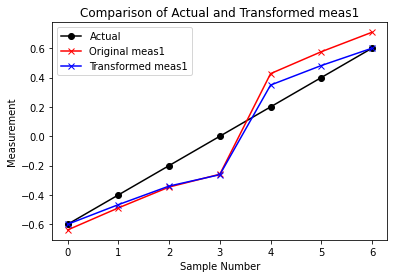

In [13]:
# Convert to numpy arrays for easier calculations
meas1 = np.array(meas1)
actual_measurements = np.array(actual_measurements)

# Step 1: Calculate the scale factor
range_meas1 = meas1.max() - meas1.min()
range_actual = actual_measurements.max() - actual_measurements.min()
scale_factor = range_actual / range_meas1

# Step 2: Calculate the shift offset
midpoint_meas1 = (meas1.max() + meas1.min()) / 2
midpoint_actual = (actual_measurements.max() + actual_measurements.min()) / 2
shift_offset = midpoint_actual - (scale_factor * midpoint_meas1)

# Step 3: Apply the transformation
new_meas1 = scale_factor * meas1 + shift_offset

# Print results
print("Original meas1:", meas1)
print("Transformed meas1 (aligned to actual):", new_meas1)
print("Actual measurements:", actual_measurements)

# Optionally, compare visually
import matplotlib.pyplot as plt

plt.plot(actual_measurements, label="Actual", marker='o', color='black')
plt.plot(meas1, label="Original meas1", marker='x', color='red')
plt.plot(new_meas1, label="Transformed meas1", marker='x', color='blue')

plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual and Transformed meas1')
plt.legend()
plt.show()